In [1]:
import pydub
import cStringIO
import StringIO
import base64
import os

In [2]:
cd /Users/bastus/Desktop/Forschungsprojekt/genimpro

/Users/bastus/Desktop/Forschungsprojekt/genimpro


In [3]:
%run importwrapper.py
%pylab inline

/Library/Python/2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [4]:
filename = genimpro.recordings.getRecordingDetails(93)[4][0][2]

In [5]:
track2 = genimpro.recordings.getRecordingDetails(133,printDetails=1)[4][1]
audio2 = genimpro.recordings.getAudioForTrack(track2)

133 (import/0003 A B-1.aiff):
    Martin Weigert (recorder): 2/6c79816a-01ff-4742-8462-3ebba84b7eb8.aiff
    Caroline Hausen (recorder): 2/b264c1d3-1737-4df1-99c3-b62e27dfcbf7.aiff


In [164]:
aiffAudio = pydub.AudioSegment.from_file('3/68b84349-4627-45cd-bc4d-3eb2d4f00708.aiff',"aiff")
aiffAudio = aiffAudio + 10
mp3audio = aiffAudio.export(cStringIO.StringIO(), format='mp3',bitrate="1600k")
compressedAudio = pydub.AudioSegment.from_file(mp3audio,"mp3")

In [189]:
uncompressed = np.array(aiffAudio.get_array_of_samples())
compressed = np.array(compressedAudio.get_array_of_samples())

In [147]:
#diff = len(compressed) - len(uncompressed)
#print diff

1920


In [148]:
#compressed = compressed[diff:]

In [149]:
#correlations = []
#for i in range(1000):
#    correlations.append(numpy.correlate(compressed[i:],uncompressed[0:-i])[0])

In [158]:
from scipy.signal import argrelextrema
x = np.array(correlations)
#offset = argrelextrema(x, np.greater,order=10)[0]
offset = numpy.argmax(x)
print offset

151


In [182]:
numpy.argmax(compressed)

1533056

In [183]:
numpy.argmax(uncompressed)

1531951

In [190]:
offset = numpy.argmax(compressed) - numpy.argmax(uncompressed)
print offset

1105


In [191]:
print len(compressed)
compressed = compressed[offset:]
print len(compressed)
print len(uncompressed)
uncompressed = uncompressed[0:len(compressed)]
print len(uncompressed)

1819008
1817903


In [188]:
len(compressed)

1817903

In [178]:
lostInCompression = uncompressed - compressed

ValueError: operands could not be broadcast together with shapes (1817088,) (1817903,) 

In [153]:
max_amplitude = 32767.0
samples = lostInCompression / max_amplitude
samples2 = compressed / max_amplitude

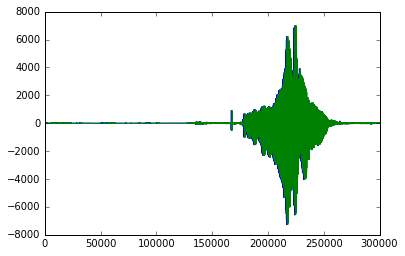

In [154]:
plt.plot(compressed[0:300000])
plt.plot(uncompressed[0:300000])

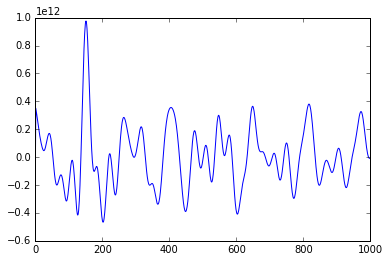

In [155]:
plt.plot(correlations)

In [157]:
wavPlayer(samples,samplerate)